# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [8]:
import pandas as pd
import numpy as np
import requests
import os
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

In [2]:

twitter_archive= pd.read_csv('twitter-archive-enhanced.csv')
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
url= 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
with open ('image_predictions.tsv', 'wb') as file:
    file.write(response.content)

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [275]:
consumer_key = 'SECRET1'
consumer_secret = 'SECRET2'
access_token = 'SECRET3'
access_secret = 'SECRET4'

In [5]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

In [6]:
id_of_tweet=twitter_archive.tweet_id.values
id_of_tweet

array([892420643555336193, 892177421306343426, 891815181378084864, ...,
       666033412701032449, 666029285002620928, 666020888022790149])

In [7]:
#code provided by udacity
count = 0
fail_dict = {}
start = timer()
with open('tweet_json.txt', 'w') as outfile:
    for tweet_id in id_of_tweet:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fail_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fail_dict)

1: 892420643555336193
Success
2: 892177421306343426
Success
3: 891815181378084864
Success
4: 891689557279858688
Success
5: 891327558926688256
Success
6: 891087950875897856
Success
7: 890971913173991426
Success
8: 890729181411237888
Success
9: 890609185150312448
Success
10: 890240255349198849
Success
11: 890006608113172480
Success
12: 889880896479866881
Success
13: 889665388333682689
Success
14: 889638837579907072
Success
15: 889531135344209921
Success
16: 889278841981685760
Success
17: 888917238123831296
Success
18: 888804989199671297
Success
19: 888554962724278272
Success
20: 888202515573088257
Fail
21: 888078434458587136
Success
22: 887705289381826560
Success
23: 887517139158093824
Success
24: 887473957103951883
Success
25: 887343217045368832
Success
26: 887101392804085760
Success
27: 886983233522544640
Success
28: 886736880519319552
Success
29: 886680336477933568
Success
30: 886366144734445568
Success
31: 886267009285017600
Success
32: 886258384151887873
Success
33: 8860541600590725

Fail
262: 842846295480000512
Success
263: 842765311967449089
Success
264: 842535590457499648
Success
265: 842163532590374912
Success
266: 842115215311396866
Success
267: 841833993020538882
Success
268: 841680585030541313
Success
269: 841439858740625411
Success
270: 841320156043304961
Success
271: 841314665196081154
Success
272: 841077006473256960
Success
273: 840761248237133825
Success
274: 840728873075638272
Success
275: 840698636975636481
Success
276: 840696689258311684
Success
277: 840632337062862849
Success
278: 840370681858686976
Success
279: 840268004936019968
Success
280: 839990271299457024
Success
281: 839549326359670784
Success
282: 839290600511926273
Success
283: 839239871831150596
Success
284: 838952994649550848
Success
285: 838921590096166913
Success
286: 838916489579200512
Success
287: 838831947270979586
Success
288: 838561493054533637
Success
289: 838476387338051585
Success
290: 838201503651401729
Success
291: 838150277551247360
Success
292: 838085839343206401
Success
293

Success
519: 810657578271330305
Success
520: 810284430598270976
Success
521: 810254108431155201
Success
522: 809920764300447744
Success
523: 809808892968534016
Success
524: 809448704142938112
Success
525: 809220051211603969
Success
526: 809084759137812480
Success
527: 808838249661788160
Success
528: 808733504066486276
Success
529: 808501579447930884
Success
530: 808344865868283904
Success
531: 808134635716833280
Success
532: 808106460588765185
Success
533: 808001312164028416
Success
534: 807621403335917568
Success
535: 807106840509214720
Success
536: 807059379405148160
Success
537: 807010152071229440
Success
538: 806629075125202948
Success
539: 806620845233815552
Success
540: 806576416489959424
Success
541: 806542213899489280
Success
542: 806242860592926720
Success
543: 806219024703037440
Success
544: 805958939288408065
Success
545: 805932879469572096
Success
546: 805826884734976000
Success
547: 805823200554876929
Success
548: 805520635690676224
Success
549: 805487436403003392
Success


Success
776: 776201521193218049
Success
777: 776113305656188928
Success
778: 776088319444877312
Success
779: 775898661951791106
Success
780: 775842724423557120
Success
781: 775733305207554048
Success
782: 775729183532220416
Success
783: 775364825476165632
Success
784: 775350846108426240
Success
785: 775096608509886464
Fail
786: 775085132600442880
Success
787: 774757898236878852
Success
788: 774639387460112384
Success
789: 774314403806253056
Success
790: 773985732834758656
Success
791: 773922284943896577
Success
792: 773704687002451968
Success
793: 773670353721753600
Success
794: 773547596996571136
Success
795: 773336787167145985
Success
796: 773308824254029826
Success
797: 773247561583001600
Success
798: 773191612633579521
Success
799: 772877495989305348
Success
800: 772826264096874500
Success
801: 772615324260794368
Success
802: 772581559778025472
Success
803: 772193107915964416
Success
804: 772152991789019136
Success
805: 772117678702071809
Success
806: 772114945936949249
Success
807

Success
1032: 745422732645535745
Success
1033: 745314880350101504
Success
1034: 745074613265149952
Success
1035: 745057283344719872
Success
1036: 744995568523612160
Success
1037: 744971049620602880
Success
1038: 744709971296780288
Success
1039: 744334592493166593
Success
1040: 744234799360020481
Success
1041: 744223424764059648
Success
1042: 743980027717509120
Success
1043: 743895849529389061
Success
1044: 743835915802583040
Success
1045: 743609206067040256
Success
1046: 743595368194129920
Success
1047: 743545585370791937
Success
1048: 743510151680958465
Success
1049: 743253157753532416
Success
1050: 743222593470234624
Success
1051: 743210557239623680
Success
1052: 742534281772302336
Success
1053: 742528092657332225
Success
1054: 742465774154047488
Success
1055: 742423170473463808
Success
1056: 742385895052087300
Success
1057: 742161199639494656
Success
1058: 742150209887731712
Success
1059: 741793263812808706
Success
1060: 741743634094141440
Success
1061: 741438259667034112
Success
10

Success
1281: 708834316713893888
Success
1282: 708810915978854401
Success
1283: 708738143638450176
Success
1284: 708711088997666817
Success
1285: 708479650088034305
Success
1286: 708469915515297792
Success
1287: 708400866336894977
Success
1288: 708356463048204288
Success
1289: 708349470027751425
Success
1290: 708149363256774660
Success
1291: 708130923141795840
Success
1292: 708119489313951744
Success
1293: 708109389455101952
Success
1294: 708026248782585858
Success
1295: 707995814724026368
Success
1296: 707983188426153984
Success
1297: 707969809498152960
Success
1298: 707776935007539200
Success
1299: 707741517457260545
Success
1300: 707738799544082433
Success
1301: 707693576495472641
Success
1302: 707629649552134146
Success
1303: 707610948723478529
Success
1304: 707420581654872064
Success
1305: 707411934438625280
Success
1306: 707387676719185920
Success
1307: 707377100785885184
Success
1308: 707315916783140866
Success
1309: 707297311098011648
Success
1310: 707059547140169728
Success
13

Success
1530: 690248561355657216
Success
1531: 690021994562220032
Success
1532: 690015576308211712
Success
1533: 690005060500217858
Success
1534: 689999384604450816
Success
1535: 689993469801164801
Success
1536: 689977555533848577
Success
1537: 689905486972461056
Success
1538: 689877686181715968
Success
1539: 689835978131935233
Success
1540: 689661964914655233
Success
1541: 689659372465688576
Success
1542: 689623661272240129
Success
1543: 689599056876867584
Success
1544: 689557536375177216
Success
1545: 689517482558820352
Success
1546: 689289219123089408
Success
1547: 689283819090870273
Success
1548: 689280876073582592
Success
1549: 689275259254616065
Success
1550: 689255633275777024
Success
1551: 689154315265683456
Success
1552: 689143371370250240
Success
1553: 688916208532455424
Success
1554: 688908934925697024
Success
1555: 688898160958271489
Success
1556: 688894073864884227
Success
1557: 688828561667567616
Success
1558: 688804835492233216
Success
1559: 688789766343622656
Success
15

Success
1779: 677895101218201600
Success
1780: 677716515794329600
Success
1781: 677700003327029250
Success
1782: 677698403548192770
Success
1783: 677687604918272002
Success
1784: 677673981332312066
Success
1785: 677662372920729601
Success
1786: 677644091929329666
Success
1787: 677573743309385728
Success
1788: 677565715327688705
Success
1789: 677557565589463040
Success
1790: 677547928504967168
Success
1791: 677530072887205888
Success
1792: 677335745548390400
Success
1793: 677334615166730240
Success
1794: 677331501395156992
Success
1795: 677328882937298944
Success
1796: 677314812125323265
Success
1797: 677301033169788928
Success
1798: 677269281705472000
Success
1799: 677228873407442944
Success
1800: 677187300187611136
Success
1801: 676975532580409345
Success
1802: 676957860086095872
Success
1803: 676949632774234114
Success
1804: 676948236477857792
Success
1805: 676946864479084545
Success
1806: 676942428000112642
Success
1807: 676936541936185344
Success
1808: 676916996760600576
Success
18

Success
2028: 671874878652489728
Success
2029: 671866342182637568
Success
2030: 671855973984772097
Success
2031: 671789708968640512
Success
2032: 671768281401958400
Success
2033: 671763349865160704
Success
2034: 671744970634719232
Success
2035: 671743150407421952
Success
2036: 671735591348891648
Success
2037: 671729906628341761
Success
2038: 671561002136281088
Success
2039: 671550332464455680
Success
2040: 671547767500775424
Success
2041: 671544874165002241
Success
2042: 671542985629241344
Success
2043: 671538301157904385
Success
2044: 671536543010570240
Success
2045: 671533943490011136
Success
2046: 671528761649688577
Success
2047: 671520732782923777
Success
2048: 671518598289059840
Success
2049: 671511350426865664
Success
2050: 671504605491109889
Success
2051: 671497587707535361
Success
2052: 671488513339211776
Success
2053: 671486386088865792
Success
2054: 671485057807351808
Success
2055: 671390180817915904
Success
2056: 671362598324076544
Success
2057: 671357843010908160
Success
20

Success
2277: 667443425659232256
Success
2278: 667437278097252352
Success
2279: 667435689202614272
Success
2280: 667405339315146752
Success
2281: 667393430834667520
Success
2282: 667369227918143488
Success
2283: 667211855547486208
Success
2284: 667200525029539841
Success
2285: 667192066997374976
Success
2286: 667188689915760640
Success
2287: 667182792070062081
Success
2288: 667177989038297088
Success
2289: 667176164155375616
Success
2290: 667174963120574464
Success
2291: 667171260800061440
Success
2292: 667165590075940865
Success
2293: 667160273090932737
Success
2294: 667152164079423490
Success
2295: 667138269671505920
Success
2296: 667119796878725120
Success
2297: 667090893657276420
Success
2298: 667073648344346624
Success
2299: 667070482143944705
Success
2300: 667065535570550784
Success
2301: 667062181243039745
Success
2302: 667044094246576128
Success
2303: 667012601033924608
Success
2304: 666996132027977728
Success
2305: 666983947667116034
Success
2306: 666837028449972224
Success
23

In [8]:
fail_dict.items()

dict_items([(888202515573088257, TweepError([{'code': 144, 'message': 'No status found with that ID.'}],)), (877611172832227328, TweepError([{'code': 179, 'message': 'Sorry, you are not authorized to see this status.'}],)), (873697596434513921, TweepError([{'code': 144, 'message': 'No status found with that ID.'}],)), (872668790621863937, TweepError([{'code': 144, 'message': 'No status found with that ID.'}],)), (872261713294495745, TweepError([{'code': 144, 'message': 'No status found with that ID.'}],)), (869988702071779329, TweepError([{'code': 144, 'message': 'No status found with that ID.'}],)), (866816280283807744, TweepError([{'code': 144, 'message': 'No status found with that ID.'}],)), (861769973181624320, TweepError([{'code': 144, 'message': 'No status found with that ID.'}],)), (856602993587888130, TweepError([{'code': 144, 'message': 'No status found with that ID.'}],)), (856330835276025856, TweepError([{'code': 144, 'message': 'No status found with that ID.'}],)), (8519539

In [9]:
import numpy as np
retry= pd.DataFrame(list(fail_dict.items()))
retry.columns=['ID', 'errors']
retry.to_csv('retry.csv', index= False)
retry  

,ID,errors
0,888202515573088257,"[{'code': 144, 'message': 'No status found wit..."
1,877611172832227328,"[{'code': 179, 'message': 'Sorry, you are not ..."
2,873697596434513921,"[{'code': 144, 'message': 'No status found wit..."
3,872668790621863937,"[{'code': 144, 'message': 'No status found wit..."
4,872261713294495745,"[{'code': 144, 'message': 'No status found wit..."
5,869988702071779329,"[{'code': 144, 'message': 'No status found wit..."
6,866816280283807744,"[{'code': 144, 'message': 'No status found wit..."
7,861769973181624320,"[{'code': 144, 'message': 'No status found wit..."
8,856602993587888130,"[{'code': 144, 'message': 'No status found wit..."
9,856330835276025856,"[{'code': 144, 'message': 'No status found wit..."


In [5]:
Whole_tweets= pd.read_json('tweet_json.txt', lines= True)
Whole_tweets.head()

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,quoted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,retweet_count,retweeted,retweeted_status,source,truncated,user
0,NaN,NaN,2017-08-01 16:23:56,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",33586,False,This is Phineas. He's a mystical boy. Only eve...,NaN,...,NaN,NaN,NaN,NaN,6946,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,NaN,NaN,2017-08-01 00:17:27,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",29135,False,This is Tilly. She's just checking pup on you....,NaN,...,NaN,NaN,NaN,NaN,5249,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,NaN,NaN,2017-07-31 00:18:03,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",21921,False,This is Archie. He is a rare Norwegian Pouncin...,NaN,...,NaN,NaN,NaN,NaN,3459,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,NaN,NaN,2017-07-30 15:58:51,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...",36651,False,This is Darla. She commenced a snooze mid meal...,NaN,...,NaN,NaN,NaN,NaN,7156,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,NaN,NaN,2017-07-29 16:00:24,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...",35033,False,This is Franklin. He would like you to stop ca...,NaN,...,NaN,NaN,NaN,NaN,7694,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [6]:
Whole_tweets.columns

Index(['contributors', 'coordinates', 'created_at', 'display_text_range',
       'entities', 'extended_entities', 'favorite_count', 'favorited',
       'full_text', 'geo', 'id', 'id_str', 'in_reply_to_screen_name',
       'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str', 'is_quote_status',
       'lang', 'place', 'possibly_sensitive', 'possibly_sensitive_appealable',
       'quoted_status', 'quoted_status_id', 'quoted_status_id_str',
       'quoted_status_permalink', 'retweet_count', 'retweeted',
       'retweeted_status', 'source', 'truncated', 'user'],
      dtype='object')

In [13]:
Additional_data= Whole_tweets[['id', 'retweet_count', 'favorite_count']].copy()
Additional_data.head()

,id,retweet_count,favorite_count
0,892420643555336193,6946,33586
1,892177421306343426,5249,29135
2,891815181378084864,3459,21921
3,891689557279858688,7156,36651
4,891327558926688256,7694,35033


In [14]:
Additional_data.head()

,id,retweet_count,favorite_count
0,892420643555336193,6946,33586
1,892177421306343426,5249,29135
2,891815181378084864,3459,21921
3,891689557279858688,7156,36651
4,891327558926688256,7694,35033


In [15]:
Additional_data.to_csv('Additional_data.csv', index= False)

## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [9]:
tweets_archived=pd.read_csv('twitter-archive-enhanced.csv')
tweets_archived

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [10]:
#load image prediction dataset
image_pred=pd.read_csv('image_predictions.tsv', sep='\t')
image_pred

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [11]:
#Load additional data from tweet json file
add_data= pd.read_csv('Additional_data.csv')
add_data.head()

,id,retweet_count,favorite_count
0,892420643555336193,6946,33586
1,892177421306343426,5249,29135
2,891815181378084864,3459,21921
3,891689557279858688,7156,36651
4,891327558926688256,7694,35033


In [12]:
#checking information aboout archived data
tweets_archived.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

<li> wrong data types
<li> To retain only original tweets
<li> Remove tweets without image  

In [13]:
image_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


<li> wrong datatype for tweet id    

In [14]:
add_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2325 entries, 0 to 2324
Data columns (total 3 columns):
id                2325 non-null int64
retweet_count     2325 non-null int64
favorite_count    2325 non-null int64
dtypes: int64(3)
memory usage: 54.6 KB


<li> inconsistent column name and wrong datatype for id column

In [15]:
#checking for duplicates
tweets_archived.tweet_id.duplicated().sum()

0

In [16]:
#checking for duplicates
add_data.id.duplicated().sum()

0

In [17]:
#checking for duplicates
image_pred.tweet_id.duplicated().sum()

0

In [18]:
#checking for duplicates
image_pred.jpg_url.duplicated().sum()

66

<li> duplicated url/images

In [19]:
#checking for total missing values in each column
tweets_archived.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

<li> remove retweeted Ids and in reply ids because we want only original tweets

In [20]:
#checking for total missing values in each column
add_data.isnull().sum()

id                0
retweet_count     0
favorite_count    0
dtype: int64

In [21]:
#checking for unique values 
image_pred.p1.value_counts()

golden_retriever             150
Labrador_retriever           100
Pembroke                      89
Chihuahua                     83
pug                           57
chow                          44
Samoyed                       43
toy_poodle                    39
Pomeranian                    38
malamute                      30
cocker_spaniel                30
French_bulldog                26
Chesapeake_Bay_retriever      23
miniature_pinscher            23
seat_belt                     22
Staffordshire_bullterrier     20
German_shepherd               20
Siberian_husky                20
Cardigan                      19
web_site                      19
Shetland_sheepdog             18
beagle                        18
teddy                         18
Maltese_dog                   18
Eskimo_dog                    18
Lakeland_terrier              17
Rottweiler                    17
Shih-Tzu                      17
kuvasz                        16
Italian_greyhound             16
          

In [22]:
#checking for unique values
image_pred.p2.value_counts()

Labrador_retriever                104
golden_retriever                   92
Cardigan                           73
Chihuahua                          44
Pomeranian                         42
French_bulldog                     41
Chesapeake_Bay_retriever           41
toy_poodle                         37
cocker_spaniel                     34
miniature_poodle                   33
Siberian_husky                     33
beagle                             28
Eskimo_dog                         27
Pembroke                           27
collie                             27
kuvasz                             26
Italian_greyhound                  22
Pekinese                           21
American_Staffordshire_terrier     21
toy_terrier                        20
Samoyed                            20
miniature_pinscher                 20
chow                               20
malinois                           20
Boston_bull                        19
Norwegian_elkhound                 19
Staffordshir

In [23]:
#checking for unique values
image_pred.p3.value_counts()

Labrador_retriever                79
Chihuahua                         58
golden_retriever                  48
Eskimo_dog                        38
kelpie                            35
kuvasz                            34
Staffordshire_bullterrier         32
chow                              32
beagle                            31
cocker_spaniel                    31
Pekinese                          29
toy_poodle                        29
Pomeranian                        29
Chesapeake_Bay_retriever          27
Great_Pyrenees                    27
Pembroke                          27
French_bulldog                    26
malamute                          26
American_Staffordshire_terrier    24
Cardigan                          23
pug                               23
basenji                           21
toy_terrier                       20
bull_mastiff                      20
Siberian_husky                    19
Boston_bull                       17
Shetland_sheepdog                 17
d

<li> p1,p2,and  p3 to form the dog breeds column

In [24]:
image_pred.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1684,814153002265309185,https://pbs.twimg.com/media/C0xz04SVIAAeyDb.jpg,1,golden_retriever,0.490068,True,Labrador_retriever,0.291956,True,chow,0.072475,True
960,705786532653883392,https://pbs.twimg.com/media/Cct1G6vVAAI9ZjF.jpg,1,web_site,0.550294,False,Labrador_retriever,0.148496,True,golden_retriever,0.148482,True
352,672538107540070400,https://pbs.twimg.com/media/CVVV1wJWoAEcOyk.jpg,1,Siamese_cat,0.383937,False,Chihuahua,0.160274,True,giant_panda,0.147745,False
786,690360449368465409,https://pbs.twimg.com/media/CZSnKw8WwAAAN7q.jpg,1,pug,0.686933,True,French_bulldog,0.076359,True,Brabancon_griffon,0.035007,True
609,680085611152338944,https://pbs.twimg.com/media/CXAiiHUWkAIN_28.jpg,3,pillow,0.778113,False,apron,0.095023,False,wallet,0.049326,False
1918,855459453768019968,https://pbs.twimg.com/media/C98z1ZAXsAEIFFn.jpg,2,Blenheim_spaniel,0.389513,True,Pekinese,0.188220,True,Japanese_spaniel,0.082628,True
1672,813112105746448384,https://pbs.twimg.com/media/C0jBJZVWQAA2_-X.jpg,1,dingo,0.287369,False,Pembroke,0.140682,True,basenji,0.090819,True
166,668981893510119424,https://pbs.twimg.com/media/CUize-0WEAAerAK.jpg,1,jellyfish,0.447246,False,coral_reef,0.238625,False,goldfish,0.040227,False
1291,751538714308972544,https://pbs.twimg.com/media/Cm4AeG8XEAAulD2.jpg,2,Labrador_retriever,0.516257,True,golden_retriever,0.210839,True,dingo,0.162022,False
886,699036661657767936,https://pbs.twimg.com/media/CbN6IW4UYAAyVDA.jpg,1,Chihuahua,0.222943,True,toyshop,0.179938,False,Weimaraner,0.163033,True


In [25]:
# summary statistics
add_data.describe()

,id,retweet_count,favorite_count
count,2.325000e+03,2325.000000,2325.000000
mean,7.417278e+17,2452.183656,7008.923011
std,6.817828e+16,4149.844607,10881.683405
min,6.660209e+17,1.000000,0.000000
25%,6.780233e+17,493.000000,1220.000000
50%,7.177900e+17,1142.000000,3032.000000
75%,7.986440e+17,2840.000000,8553.000000
max,8.924206e+17,70027.000000,143657.000000


In [26]:
# summary statistics
image_pred.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [27]:
# summary statistics
tweets_archived.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [28]:
# summary statistics
tweets_archived.query("rating_numerator> 12")

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None
10,890006608113172480,NaN,NaN,2017-07-26 00:31:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Koda. He is a South Australian decksha...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890006608...,13,10,Koda,None,None,None,None
11,889880896479866881,NaN,NaN,2017-07-25 16:11:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bruno. He is a service shark. Only get...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889880896...,13,10,Bruno,None,None,None,None


<li> Some tweets images contains more that one dog

In [29]:
tweets_archived.query("rating_denominator== 170")

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None


In [30]:
tweets_archived.query("rating_denominator> 10")

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: After so many requests, this is...",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,4,20,None,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None
1228,713900603437621249,NaN,NaN,2016-03-27 01:29:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy Saturday here's 9 puppers on a bench. 99...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/713900603...,99,90,None,None,None,None,None
1254,710658690886586372,NaN,NaN,2016-03-18 02:46:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a brigade of puppers. All look very pre...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/710658690...,80,80,None,None,None,None,None


<li> Some ratings are for more than one dog
<li> Rating denominator should have just one number which is 10, therefore, it will be of less use in the dataset

In [31]:
tweets_archived.name.sort_values()

1035            Abby
1021            Abby
938              Ace
1933            Acro
1327           Adele
1934           Aiden
77               Aja
480            Akumi
820               Al
875           Albert
1954          Albert
144            Albus
412            Albus
1115         Aldrick
2046       Alejandro
374        Alexander
1189    Alexanderson
486              Alf
2238           Alfie
661            Alfie
367            Alfie
1616           Alfie
858            Alfie
51              Alfy
201            Alice
1701           Alice
1495           Amber
1334         Ambrose
2078             Amy
2195          Amélie
            ...     
852               my
988              not
335              not
1747      officially
1206             old
993              one
1936             one
924              one
369              one
2326           quite
169            quite
118            quite
193            quite
2030           space
22              such
2345             the
2346         

<li> Incorrect dog name and some dog names are missing (has none as their names)

In [32]:
tweets_archived.loc[(tweets_archived['name'].str.islower())]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
22,887517139158093824,NaN,NaN,2017-07-19 03:39:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I've yet to rate a Venezuelan Hover Wiener. Th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887517139...,14,10,such,None,None,None,None
56,881536004380872706,NaN,NaN,2017-07-02 15:32:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a pupper approaching maximum borkdrive...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881536004...,14,10,a,None,None,pupper,None
118,869988702071779329,NaN,NaN,2017-05-31 18:47:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: We only rate dogs. This is quit...,8.591970e+17,4.196984e+09,2017-05-02 00:04:57 +0000,https://twitter.com/dog_rates/status/859196978...,12,10,quite,None,None,None,None
169,859196978902773760,NaN,NaN,2017-05-02 00:04:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. This is quite clearly a smo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/859196978...,12,10,quite,None,None,None,None
193,855459453768019968,NaN,NaN,2017-04-21 16:33:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Guys, we only rate dogs. This is quite clearly...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/855459453...,12,10,quite,None,None,None,None
335,832645525019123713,NaN,NaN,2017-02-17 17:38:57 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",There's going to be a dog terminal at JFK Airp...,NaN,NaN,NaN,http://us.blastingnews.com/news/2017/02/jfk-an...,10,10,not,None,None,None,None
369,828650029636317184,NaN,NaN,2017-02-06 17:02:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Occasionally, we're sent fantastic stories. Th...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/828650029...,14,10,one,None,None,None,None
542,806219024703037440,NaN,NaN,2016-12-06 19:29:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. Please stop sending in non-...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/806219024...,11,10,incredibly,None,None,None,None
649,792913359805018113,NaN,NaN,2016-10-31 02:17:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a perfect example of someone who has t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/792913359...,13,10,a,None,None,None,None
682,788552643979468800,NaN,NaN,2016-10-19 01:29:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Say hello to mad pupper. You kn...,7.363926e+17,4.196984e+09,2016-05-28 03:04:00 +0000,"https://vine.co/v/iEggaEOiLO3,https://vine.co/...",13,10,mad,None,None,pupper,None


In [33]:
tweets_archived.query("name=='None'")

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
12,889665388333682689,NaN,NaN,2017-07-25 01:55:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo that seems to be on the fence a...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889665388...,13,10,None,None,None,None,puppo
24,887343217045368832,NaN,NaN,2017-07-18 16:08:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",You may not have known you needed to see this ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887343217...,13,10,None,None,None,None,None
25,887101392804085760,NaN,NaN,2017-07-18 00:07:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This... is a Jubilant Antarctic House Bear. We...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887101392...,12,10,None,None,None,None,None
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,19607400.0,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
35,885518971528720385,NaN,NaN,2017-07-13 15:19:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I have a new hero and his name is Howard. 14/1...,NaN,NaN,NaN,https://twitter.com/4bonds2carbon/status/88551...,14,10,None,None,None,None,None
37,885167619883638784,NaN,NaN,2017-07-12 16:03:00 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a corgi undercover as a malamute....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/885167619...,13,10,None,None,None,None,None
41,884441805382717440,NaN,NaN,2017-07-10 15:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...","I present to you, Pup in Hat. Pup in Hat is gr...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/884441805...,14,10,None,None,None,None,None


<li> some images are not dog( known through the text content 'we only rate dogs' and others)

In [34]:
tweets_archived.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [35]:
tweets_archived.floofer.value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [36]:
tweets_archived.pupper.value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [37]:
tweets_archived.puppo.value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

<li> doggo, floofer,pupper,puppo columns show be a column that describe the dog stages

In [38]:
tweets_archived.query("tweet_id==667435689202614272")

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2278,667435689202614272,NaN,NaN,2015-11-19 20:14:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Ermergerd 12/10 https://t.co/PQni2sjPsm,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667435689...,12,10,None,None,None,None,None


<li> fix this dog name mannually. name is Ermergerd

### Quality issues

1. In tweets_archived, image_prediction and additional data data, we do not want the data to include retweets and in reply
2. Some tweets do not have images
3. Some tweets images are not dogs as expected in the tweets archived data
4. Incorrect dog names in tweets_archived
5. The content in the Source column are contained in an HTML Tag
6. Incorrect rating numerator in twitter archive data
7. Drop columns with few data points and non-uniqueness in them
8. Wrong data type in timestamp and tweet_id
9. Get actual dog breed from image prediction dataset



### Tidiness issues
1. In tweet_archived data, doggo,	floofer,	pupper,	puppo columns must be a column under dog stages

2. Additional data and image predictions dataset that should be merged with the tweet_archived data

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [39]:
# Make copies of original pieces of data
additional_data_clean= add_data.copy()
tweets_archived_clean=tweets_archived.copy()
image_prediction_clean=image_pred.copy()

### Issue #1:  Data Quality

#### Define:1.  Remove retweets  across dataset

#### Code

In [40]:
tweets_archived_clean= tweets_archived_clean[tweets_archived_clean['retweeted_status_id'].isnull()]

In [41]:
tweets_archived_clean = tweets_archived_clean[tweets_archived_clean['in_reply_to_status_id'].isnull()]


#### Test

In [42]:
tweets_archived_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2097 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2097 non-null object
source                        2097 non-null object
text                          2097 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2094 non-null object
rating_numerator              2097 non-null int64
rating_denominator            2097 non-null int64
name                          2097 non-null object
doggo                         2097 non-null object
floofer                       2097 non-null object
pupper                        2097 non-null object
puppo                         2097 non-null object
dtypes: float64(4), int64(3), object(10)

#### Define: 2. Remove tweet ids without images

#### code

In [43]:
tweets_archived_clean=tweets_archived_clean[tweets_archived_clean["expanded_urls"].notna()]


#### Test

In [44]:
tweets_archived_clean.shape

(2094, 17)

In [45]:
tweets_archived_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2094 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2094 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2094 non-null object
source                        2094 non-null object
text                          2094 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2094 non-null object
rating_numerator              2094 non-null int64
rating_denominator            2094 non-null int64
name                          2094 non-null object
doggo                         2094 non-null object
floofer                       2094 non-null object
pupper                        2094 non-null object
puppo                         2094 non-null object
dtypes: float64(4), int64(3), object(10)

#### Define:3.  Resolving Dog names issue #1 None: remove tweets that didnt send dog

manually fix the one with tweet_id=667435689202614272",878604707211726852 index=72, 2278

#### Code

In [46]:
# Checking tweet_id==667435689202614272, 878604707211726852
tweets_archived_clean.loc[[72, 2278],['text', 'name']]
#tweets_archived_clean.loc[[72],['text', 'name']]

,text,name
72,Martha is stunning how h*ckin dare you. 13/10 ...,None
2278,Ermergerd 12/10 https://t.co/PQni2sjPsm,None


In [47]:
tweets_archived_clean.loc[[72,2278],'name'] = ['Martha','Ermergerd']

#### Test

In [48]:
tweets_archived_clean.loc[[72, 2278],['text', 'name']]

,text,name
72,Martha is stunning how h*ckin dare you. 13/10 ...,Martha
2278,Ermergerd 12/10 https://t.co/PQni2sjPsm,Ermergerd


In [49]:
#displaying full contents of text column
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_rows', None)


In [50]:
# create a dataframe to consist all entries with none
to_fix_none_notdog=tweets_archived_clean.query("name=='None'")


In [51]:
import re

In [52]:
#get tweets that sent somethingelse apart from dog. 
#this is known through 'we only rate dogs', 'only send in dogs', 'only send dogs' contained in the text
stringss=to_fix_none_notdog.text.values
val=[]
df = pd.DataFrame(stringss, columns=["rawtext"], index=to_fix_none_notdog.index)
pattern1 = r"We\sonly\srate\sdogs"
pattern2=r"\Wonly\ssend\sin\sdogs\."
pattern3=r"Only\ssend\sdogs"
pattern4 = re.compile(r"\bwe\sonly\srate\sdogs\b", re.IGNORECASE)
pattern5 = r"don't\srate"
for tex in df.rawtext:
    
    if re.match(pattern1, tex):
        value="notdog"
    elif re.match(pattern2, tex):
        value="notdog"
    elif re.match(pattern3, tex):
        value="notdog"
    elif re.match(pattern4, tex):
        value="notdog"
    elif re.match(pattern5, tex):
        value="notdog"
    else: 
        value="None"
    val.append(value)
df['name']=val
df


,rawtext,name
5,Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,None
7,When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,None
12,Here's a puppo that seems to be on the fence about something haha no but seriously someone help her. 13/10 https://t.co/BxvuXk0UCm,None
24,You may not have known you needed to see this today. 13/10 please enjoy (IG: emmylouroo) https://t.co/WZqNqygEyV,None
25,This... is a Jubilant Antarctic House Bear. We only rate dogs. Please only send dogs. Thank you... 12/10 would suffocate in floof https://t.co/4Ad1jzJSdp,None
35,I have a new hero and his name is Howard. 14/10 https://t.co/gzLHboL7Sk,None
37,Here we have a corgi undercover as a malamute. Pawbably doing important investigative work. Zero control over tongue happenings. 13/10 https://t.co/44ItaMubBf,None
41,"I present to you, Pup in Hat. Pup in Hat is great for all occasions. Extremely versatile. Compact as h*ck. 14/10 (IG: itselizabethgales) https://t.co/vvBOcC2VdC",None
42,OMG HE DIDN'T MEAN TO HE WAS JUST TRYING A LITTLE BARKOUR HE'S SUPER SORRY 13/10 WOULD FORGIVE IMMEDIATE https://t.co/uF3pQ8Wubj,None
47,"Please only send dogs. We don't rate mechanics, no matter how h*ckin good. Thank you... 13/10 would sneak a pat https://t.co/Se5fZ9wp5E",None


#### Test

In [53]:
df.name.value_counts()

None      588
notdog    10 
Name: name, dtype: int64

In [54]:
df.query("name=='None'")

,rawtext,name
5,Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,None
7,When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,None
12,Here's a puppo that seems to be on the fence about something haha no but seriously someone help her. 13/10 https://t.co/BxvuXk0UCm,None
24,You may not have known you needed to see this today. 13/10 please enjoy (IG: emmylouroo) https://t.co/WZqNqygEyV,None
25,This... is a Jubilant Antarctic House Bear. We only rate dogs. Please only send dogs. Thank you... 12/10 would suffocate in floof https://t.co/4Ad1jzJSdp,None
35,I have a new hero and his name is Howard. 14/10 https://t.co/gzLHboL7Sk,None
37,Here we have a corgi undercover as a malamute. Pawbably doing important investigative work. Zero control over tongue happenings. 13/10 https://t.co/44ItaMubBf,None
41,"I present to you, Pup in Hat. Pup in Hat is great for all occasions. Extremely versatile. Compact as h*ck. 14/10 (IG: itselizabethgales) https://t.co/vvBOcC2VdC",None
42,OMG HE DIDN'T MEAN TO HE WAS JUST TRYING A LITTLE BARKOUR HE'S SUPER SORRY 13/10 WOULD FORGIVE IMMEDIATE https://t.co/uF3pQ8Wubj,None
47,"Please only send dogs. We don't rate mechanics, no matter how h*ckin good. Thank you... 13/10 would sneak a pat https://t.co/Se5fZ9wp5E",None


#### Define: 4. Resolving Dog names issue #3 incorrect names- lower case names

Resolving Dog names issue 1: None 
They have names but somehow not capture 

#### Code

In [55]:
to_fix_none=tweets_archived_clean.query("name=='None'")

In [56]:
# text contains 'name is' or 'named'
df['named'] = df["rawtext"].str.extract(r'\bnamed\s+(\S+)')
df['nameis'] = df["rawtext"].str.extract(r'\bname\s+is\s+(\S+)')


df

,rawtext,name,named,nameis
5,Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,None,NaN,NaN
7,When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,None,NaN,NaN
12,Here's a puppo that seems to be on the fence about something haha no but seriously someone help her. 13/10 https://t.co/BxvuXk0UCm,None,NaN,NaN
24,You may not have known you needed to see this today. 13/10 please enjoy (IG: emmylouroo) https://t.co/WZqNqygEyV,None,NaN,NaN
25,This... is a Jubilant Antarctic House Bear. We only rate dogs. Please only send dogs. Thank you... 12/10 would suffocate in floof https://t.co/4Ad1jzJSdp,None,NaN,NaN
35,I have a new hero and his name is Howard. 14/10 https://t.co/gzLHboL7Sk,None,NaN,Howard.
37,Here we have a corgi undercover as a malamute. Pawbably doing important investigative work. Zero control over tongue happenings. 13/10 https://t.co/44ItaMubBf,None,NaN,NaN
41,"I present to you, Pup in Hat. Pup in Hat is great for all occasions. Extremely versatile. Compact as h*ck. 14/10 (IG: itselizabethgales) https://t.co/vvBOcC2VdC",None,NaN,NaN
42,OMG HE DIDN'T MEAN TO HE WAS JUST TRYING A LITTLE BARKOUR HE'S SUPER SORRY 13/10 WOULD FORGIVE IMMEDIATE https://t.co/uF3pQ8Wubj,None,NaN,NaN
47,"Please only send dogs. We don't rate mechanics, no matter how h*ckin good. Thank you... 13/10 would sneak a pat https://t.co/Se5fZ9wp5E",None,NaN,NaN


In [57]:
to_fix_none.shape

(598, 17)

In [58]:
df_named=df[df['named'].notna()]
df_named

,rawtext,name,named,nameis
2166,Here we have a Gingivitis Pumpernickel named Zeus. Unmatched tennis ball capacity. 10/10 would highly recommend https://t.co/jPkd7hhX7m,None,Zeus.,NaN
2227,Here we have an Azerbaijani Buttermilk named Guss. He sees a demon baby Hitler behind his owner. 10/10 stays alert https://t.co/aeZykWwiJN,None,Guss.,NaN
2269,This a Norwegian Pewterschmidt named Tickles. Ears for days. 12/10 I care deeply for Tickles https://t.co/0aDF62KVP7,None,Tickles.,NaN


In [59]:
df_named['named']=df_named.named.str.split('.', expand=True)[0]
df_named.named

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


2166    Zeus   
2227    Guss   
2269    Tickles
Name: named, dtype: object

In [60]:
#Assign captured names with text 'named'
df.loc[df_named.index,'name']=df_named.named


In [61]:
#Assign captured names with text 'name is'
df_nameis=df[df['nameis'].notna()]
df_nameis['nameis']=df_nameis.nameis.str.split('.', expand=True)[0]
df_nameis.nameis
df.loc[df_nameis.index,'name']=df_nameis.nameis

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [62]:
df.name.unique()

array(['None', 'Howard', 'notdog', 'Zoey', 'Thea', 'Sabertooth', 'Zeus',
       'Guss', 'Big', 'Tickles'], dtype=object)

In [63]:
df.drop(columns=['named','nameis'], inplace=True)

In [64]:
# Text contains "this is"
df['thisis'] = df["rawtext"].str.extract(r'\bthis\s+is\s+(\S+)')
df[df['thisis'].notna()]

,rawtext,name,thisis
349,"I usually only share these on Friday's, but this is Blue. He's a very smoochable pooch who needs your help. 13/10\n\nhttps://t.co/piiX0ke8Z6 https://t.co/1UHrKcaCiO",None,Blue.
887,We only rate dogs... this is a Taiwanese Guide Walrus. Im getting real heckin tired of this. Please send dogs. 10/10 https://t.co/49hkNAsubi,notdog,a
893,No no no this is all wrong. The Walmart had to have run into the dog driving the car. 10/10 someone tell him it's ok\nhttps://t.co/fRaTGcj68A,None,all
1051,"For anyone who's wondering, this is what happens after a doggo catches it's tail... 11/10 https://t.co/G4fNhzelDv",None,what
1068,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",None,Bretagne.
1111,"""Ello this is dog how may I assist"" ...10/10 https://t.co/jeAENpjH7L",None,dog
1401,I know this is a tad late but here's a wonderful Valentine's Day pupper 12/10 https://t.co/hTE2PEwGvi,None,a
1669,"I know we joke around on here, but this is getting really frustrating. We rate dogs. Not T-Rex. Thank you... 8/10 https://t.co/5aFw7SWyxU",None,getting
1841,"Ok, I'll admit this is a pretty adorable bunny hopping towards the ocean but please only send in dogs... 11/10 https://t.co/sfsVCGIipI",None,a
1890,This pup was carefully tossed to make it look like she's riding that horse. I have no words this is fabulous. 12/10 https://t.co/Bob33W4sfD,None,fabulous.


In [65]:
#since they are just two correct names, mannually fix them
df.loc[349,'name'] = 'Blue'
df.loc[1068,'name'] = 'Bretagne'

In [66]:
tweets_archived_clean.loc[df.index,'name']=df.name

In [67]:
notdog=tweets_archived_clean.query("name=='notdog'")

In [68]:
tweets_archived_clean=tweets_archived_clean.drop(labels=notdog.index)

In [69]:
tweets_archived_clean.query("name=='notdog'").shape

(0, 17)

In [70]:
tweets_archived_clean.query("name=='None'").shape

(578, 17)

In [71]:
#put incorrect names in a dataframe
incorrectname_toreplace = tweets_archived_clean.loc[(tweets_archived_clean['name'].str.islower())]


In [72]:
incorrectname_toreplace.loc[:,['text', 'name']]

,text,name
22,I've yet to rate a Venezuelan Hover Wiener. This is such an honor. 14/10 paw-inspiring af (IG: roxy.thedoxy) https://t.co/20VrLAA8ba,such
56,Here is a pupper approaching maximum borkdrive. Zooming at never before seen speeds. 14/10 paw-inspiring af \n(IG: puffie_the_chow) https://t.co/ghXBIIeQZF,a
169,We only rate dogs. This is quite clearly a smol broken polar bear. We'd appreciate if you only send dogs. Thank you... 12/10 https://t.co/g2nSyGenG9,quite
193,"Guys, we only rate dogs. This is quite clearly a bulbasaur. Please only send dogs. Thank you... 12/10 human used pet, it's super effective https://t.co/Xc7uj1C64x",quite
335,There's going to be a dog terminal at JFK Airport. This is not a drill. 10/10 \nhttps://t.co/dp5h9bCwU7,not
369,"Occasionally, we're sent fantastic stories. This is one of them. 14/10 for Grace https://t.co/bZ4axuH6OK",one
542,We only rate dogs. Please stop sending in non-canines like this Freudian Poof Lion. This is incredibly frustrating... 11/10 https://t.co/IZidSrBvhi,incredibly
649,Here is a perfect example of someone who has their priorities in order. 13/10 for both owner and Forrest https://t.co/LRyMrU7Wfq,a
801,Guys this is getting so out of hand. We only rate dogs. This is a Galapagos Speed Panda. Pls only send dogs... 10/10 https://t.co/8lpAGaZRFn,a
819,We only rate dogs. Pls stop sending in non-canines like this Arctic Floof Kangaroo. This is very frustrating. 11/10 https://t.co/qlUDuPoE3d,very


In [73]:
#split text into words
incorrectname_toreplace['text_split'] = incorrectname_toreplace['text'].str.split()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [74]:
#names found to be after text; named, here we have, this is a, here is, say hello to, meet

names = []
def extracts(toreplace):
    
    '''
    This funtion find names after some words 
   
    '''
    if 'named' in toreplace['text'] and re.match(r'[A-Z].*', toreplace['text_split'][(toreplace['text_split'].index('named') + 1)]): 
            names.append(toreplace['text_split'][(toreplace['text_split'].index('named') + 1)])
    elif toreplace['text'].startswith('Here we have ') and re.match(r'[A-Z].*', toreplace['text_split'][3]):
            names.append(toreplace['text_split'][3].strip('.').strip(','))
            
    elif toreplace['text'].startswith('This is a ') and re.match(r'[A-Z].*', toreplace['text_split'][4]):
            names.append(toreplace['text_split'][4].strip('.').strip(','))
    
    elif toreplace['text'].startswith('Here is ') and re.match(r'[A-Z].*', toreplace['text_split'][2]):
            names.append(toreplace['text_split'][2].strip('.').strip(','))
   
    elif toreplace['text'].startswith('Say hello to ') and re.match(r'[A-Z].*', toreplace['text_split'][3]):
            names.append(toreplace['text_split'][3].strip('.').strip(','))
    
    elif toreplace['text'].startswith('Meet ') and re.match(r'[A-Z].*', toreplace['text_split'][1]):
            names.append(toreplace['text_split'][1].strip('.').strip(','))
           
    else:
        names.append('None') 
    return names

#Apply function on dataframe
incorrectname_toreplace.apply(extracts, axis=1)
# assign names to dataframe
incorrectname_toreplace['names'] = names
incorrectname_toreplace['names']=incorrectname_toreplace['names'].str.split('.', expand=True)[0]

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [75]:
incorrectname_toreplace['names'].value_counts()

None           73
We             2 
Chuk           1 
Johm           1 
Vesuvius       1 
Leroi          1 
Alfonso        1 
Cheryl         1 
Arctic         1 
Cumberfloof    1 
Toblerone      1 
Jacob          1 
Baklava        1 
Octaviath      1 
Kohl           1 
Rufus          1 
Klint          1 
Tuscan         1 
Spork          1 
Kip            1 
Pepe           1 
Alfredo        1 
Cherokee       1 
Berta          1 
Kingfisher     1 
Wylie          1 
Rand           1 
Alphred        1 
Piers          1 
Jessiga        1 
Hemry          1 
Name: names, dtype: int64

In [76]:
tweets_archived_clean.loc[incorrectname_toreplace.index,'name']=incorrectname_toreplace.names

#### Test

In [77]:
tweets_archived_clean.name.value_counts()

None              651
Charlie           11 
Lucy              11 
Oliver            10 
Cooper            10 
Tucker            9  
Penny             9  
Winston           8  
Sadie             8  
Lola              8  
Toby              7  
Daisy             7  
Bella             6  
Stanley           6  
Koda              6  
Jax               6  
Oscar             6  
Bo                6  
Bailey            6  
Rusty             5  
Leo               5  
Chester           5  
Milo              5  
Louis             5  
Dave              5  
Scout             5  
Buddy             5  
Bentley           5  
Derek             4  
Jeffrey           4  
Gary              4  
Chip              4  
Oakley            4  
Sammy             4  
Larry             4  
Maggie            4  
Zoey              4  
Alfie             4  
Reggie            4  
Phil              4  
Sophie            4  
Boomer            4  
Clarence          4  
Clark             4  
Jack              4  
Scooter   

#### Define: 5. Extract content from a tag in source column

In [78]:
from bs4 import BeautifulSoup



In [79]:
tweets_archived_clean.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     1952
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                        91  
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                     30  
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>    11  
Name: source, dtype: int64

In [80]:
tweets_archived_clean['content']=tweets_archived_clean['source'].apply(lambda x: BeautifulSoup(x,"lxml").find('a').contents[0])

In [81]:
tweets_archived_clean['link']=tweets_archived_clean['source'].apply(lambda x: BeautifulSoup(x,"lxml").find('a')['href'])

#### Test

In [82]:
tweets_archived_clean.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,content,link
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None,Twitter for iPhone,http://twitter.com/download/iphone
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None,Twitter for iPhone,http://twitter.com/download/iphone


#### Define: 6.  Ratings Numerator Issue
Entries with denominators greater than 10 are valid because it is either not a dog or the image has more that one dogs. However, it will be dropped because they are few in number.
Since there just three data points that have the intended denominator(10), we can correct it mannualy and drop the rest 

#### Code

In [83]:
# Getting tweets with denominator greater than 10
tweets_archived_clean.query("rating_denominator> 10") 

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,content,link
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1",84,70,None,None,None,None,None,Twitter for iPhone,http://twitter.com/download/iphone
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244762497024/video/1,165,150,None,None,None,None,None,Twitter for iPhone,http://twitter.com/download/iphone
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1",9,11,Bretagne,None,None,None,None,Twitter for iPhone,http://twitter.com/download/iphone
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023742988288/photo/1,204,170,None,None,None,None,None,Twitter for iPhone,http://twitter.com/download/iphone
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582966214656/photo/1,4,20,None,None,None,None,None,Twitter for iPhone,http://twitter.com/download/iphone
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118184652801/photo/1,50,50,Bluebert,None,None,None,None,Twitter for iPhone,http://twitter.com/download/iphone
1228,713900603437621249,NaN,NaN,2016-03-27 01:29:02 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,NaN,NaN,NaN,https://twitter.com/dog_rates/status/713900603437621249/photo/1,99,90,None,None,None,None,None,Twitter for iPhone,http://twitter.com/download/iphone
1254,710658690886586372,NaN,NaN,2016-03-18 02:46:49 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,NaN,NaN,NaN,https://twitter.com/dog_rates/status/710658690886586372/photo/1,80,80,None,None,None,None,None,Twitter for iPhone,http://twitter.com/download/iphone
1274,709198395643068416,NaN,NaN,2016-03-14 02:04:08 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter fo

In [84]:
# fix these manually 1068-14/10,1202-11/10, 1662-10/10
tweets_archived_clean.loc[[1068, 1202, 1662],'rating_numerator'] = [14,11,10]
tweets_archived_clean.loc[[1068, 1202, 1662],'rating_denominator'] = [10,10,10]

In [85]:
tweets_archived_clean.query("rating_numerator> 20")

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,content,link
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1",84,70,None,None,None,None,None,Twitter for iPhone,http://twitter.com/download/iphone
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://twitter.com/dog_rates/status/810984652412424192/photo/1",24,7,Sam,None,None,None,None,Twitter for iPhone,http://twitter.com/download/iphone
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786709082849828864/photo/1,75,10,Logan,None,None,None,None,Twitter for iPhone,http://twitter.com/download/iphone
763,778027034220126208,NaN,NaN,2016-09-20 00:24:34 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/778027034220126208/photo/1,27,10,Sophie,None,None,pupper,None,Twitter for iPhone,http://twitter.com/download/iphone
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244762497024/video/1,165,150,None,None,None,None,None,Twitter for iPhone,http://twitter.com/download/iphone
979,749981277374128128,NaN,NaN,2016-07-04 15:00:45 +0000,"<a href=""https://about.twitter.com/products/tweetdeck"" rel=""nofollow"">TweetDeck</a>",This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh,NaN,NaN,NaN,https://twitter.com/dog_rates/status/749981277374128128/photo/1,1776,10,Atticus,None,None,None,None,TweetDeck,https://about.twitter.com/products/tweetdeck
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023742988288/photo/1,204,170,None,None,None,None,None,Twitter for iPhone,http://twitter.com/download/iphone
1228,713900603437621249,NaN,NaN,2016-03-27 01:29:02 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,NaN,NaN,NaN,https://twitter.com/dog_rates/status/713900603437621249/photo/1,99,90,None,None,None,None,None,Twitter for iPhone,http://twitter.com/download/iphone
1254,710658690886586372,NaN,NaN,2016-03-18 02:46:49 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's a brigade of puppers. All lo

In [86]:
#majority of dogs with invalid denominator are group pictures
invalid_denominator=tweets_archived_clean.query("rating_denominator> 10")

In [87]:
tweets_archived_clean=tweets_archived_clean.drop(invalid_denominator.index, axis=0)

In [88]:
tweets_archived_clean.query("rating_numerator> 20")

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,content,link
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://twitter.com/dog_rates/status/810984652412424192/photo/1",24,7,Sam,None,None,None,None,Twitter for iPhone,http://twitter.com/download/iphone
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786709082849828864/photo/1,75,10,Logan,None,None,None,None,Twitter for iPhone,http://twitter.com/download/iphone
763,778027034220126208,NaN,NaN,2016-09-20 00:24:34 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/778027034220126208/photo/1,27,10,Sophie,None,None,pupper,None,Twitter for iPhone,http://twitter.com/download/iphone
979,749981277374128128,NaN,NaN,2016-07-04 15:00:45 +0000,"<a href=""https://about.twitter.com/products/tweetdeck"" rel=""nofollow"">TweetDeck</a>",This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh,NaN,NaN,NaN,https://twitter.com/dog_rates/status/749981277374128128/photo/1,1776,10,Atticus,None,None,None,None,TweetDeck,https://about.twitter.com/products/tweetdeck
1712,680494726643068929,NaN,NaN,2015-12-25 21:06:00 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,NaN,NaN,NaN,https://twitter.com/dog_rates/status/680494726643068929/photo/1,26,10,None,None,None,None,None,Twitter for iPhone,http://twitter.com/download/iphone
2074,670842764863651840,NaN,NaN,2015-11-29 05:52:33 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",After so many requests... here you go.\n\nGood dogg. 420/10 https://t.co/yfAAo1gdeY,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670842764863651840/photo/1,420,10,None,None,None,None,None,Twitter for iPhone,http://twitter.com/download/iphone


In [89]:
# fix those with decimals by rounding up manually 695-10/10,763-12/10, 1712-11/10
tweets_archived_clean.loc[[695, 763, 1712],'rating_numerator'] = [10,12,11]


In [90]:
# drop outliers
tweets_archived_clean=tweets_archived_clean.drop([516,979, 2074], axis=0)

#### Test

In [91]:
tweets_archived_clean.query("rating_denominator> 10")

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,content,link


In [92]:
tweets_archived_clean.query("rating_numerator> 20")

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,content,link


#### Define: 7. inconsistent column name for twitter ID in additional data and Drop useless columns in twitter archive

#### Code

In [93]:
additional_data_clean.columns

Index(['id', 'retweet_count', 'favorite_count'], dtype='object')

In [94]:
tweets_archived_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'content', 'link'],
      dtype='object')

Some columns with no uniqueness

In [95]:
tweets_archived_clean.expanded_urls.value_counts()

https://vine.co/v/ea0OwvPTx9l                                                                                                                                                                                                                                                                                                                                                                                                                               2
https://twitter.com/dog_rates/status/780858289093574656/photo/1                                                                                                                                                                                                                                                                                                                                                                                             1
https://twitter.com/dog_rates/status/687664829264453632/photo/1                                             

In [96]:
additional_data_clean.rename({'id': 'tweet_id'}, axis=1, inplace =True)

In [97]:
drop_columns=['in_reply_to_status_id', 'in_reply_to_user_id','retweeted_status_id', 'retweeted_status_user_id','retweeted_status_timestamp','source','expanded_urls','rating_denominator']
tweets_archived_clean=tweets_archived_clean.drop(drop_columns, axis=1)

In [98]:
tweets_archived_clean.rename({'content': 'source'}, axis=1, inplace =True)

#### Test

In [99]:
additional_data_clean.columns

Index(['tweet_id', 'retweet_count', 'favorite_count'], dtype='object')

In [100]:
tweets_archived_clean.columns

Index(['tweet_id', 'timestamp', 'text', 'rating_numerator', 'name', 'doggo',
       'floofer', 'pupper', 'puppo', 'source', 'link'],
      dtype='object')

In [101]:
tweets_archived_clean.shape

(2069, 11)

#### Define: 8: Incorrect datatypes

#### Code

In [102]:
#correct data type errors these columns
tweets_archived_clean['timestamp'] = pd.to_datetime(tweets_archived_clean['timestamp'])
tweets_archived_clean['tweet_id'] = tweets_archived_clean['tweet_id'].astype('str')
additional_data_clean['tweet_id'] = additional_data_clean['tweet_id'].astype('str')
image_prediction_clean['tweet_id'] = image_prediction_clean['tweet_id'].astype('str')

#### Test

In [103]:
tweets_archived_clean.tweet_id.dtypes

dtype('O')

In [104]:
tweets_archived_clean.timestamp.dtypes

dtype('<M8[ns]')

In [105]:
additional_data_clean.tweet_id.dtypes

dtype('O')

In [106]:
image_prediction_clean.tweet_id.dtypes

dtype('O')

#### Define: 9: Getting the Dog breeds from image Prediction data

#### Code

In [107]:
#check columns in image prediction
image_prediction_clean.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

In [108]:
image_prediction_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


In [109]:
maxconf=[]
def max_conf(row):
    '''
    A function that returns maximum confidence valus for true prediction
    
    '''
    if row['p1_dog']==True and row['p2_dog']==True and row['p3_dog']==True :
        max_cof=row[['p1_conf', 'p2_conf', 'p3_conf']].max()
        maxconf.append(max_cof)
       
    elif row['p1_dog']==True and row['p2_dog']==True and row['p3_dog']==False:
        max_cof=row[['p1_conf', 'p2_conf']].max()
        maxconf.append(max_cof)
    elif row['p1_dog']==True and row['p2_dog']==False and row['p3_dog']==True:
        max_cof=row[['p1_conf', 'p3_conf']].max()
        maxconf.append(max_cof)
    elif row['p1_dog']==False and row['p2_dog']==True and row['p3_dog']==True:
        max_cof=row[['p2_conf', 'p3_conf']].max()
        maxconf.append(max_cof)
    elif row['p1_dog']==True and row['p2_dog']==False and row['p3_dog']==False:
        maxconf.append(row['p1_conf'])
    elif row['p1_dog']==False and row['p2_dog']==True and row['p3_dog']==False:
        maxconf.append(row['p2_conf'])
    elif row['p1_dog']==False and row['p2_dog']==False and row['p3_dog']==True:
        maxconf.append(row['p3_conf'])
    else:
        maxconf.append(0.0000)
    return maxconf
#Apply function on dataframe
image_prediction_clean.apply(max_conf, axis = 1)

image_prediction_clean['confidence'] = maxconf

In [110]:
image_prediction_clean.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,confidence
1060,715009755312439296,https://pbs.twimg.com/media/Cew5kyOWsAA8Y_o.jpg,1,dingo,0.310903,False,Chihuahua,0.142288,True,Cardigan,0.103945,True,0.142288
510,676146341966438401,https://pbs.twimg.com/media/CWIngp5WEAAJOy3.jpg,1,Irish_water_spaniel,0.388332,True,standard_poodle,0.284121,True,greenhouse,0.034868,False,0.388332
1507,785639753186217984,https://pbs.twimg.com/media/CucnLmeWAAALOSC.jpg,1,porcupine,0.978042,False,sea_urchin,0.006106,False,echidna,0.005442,False,0.000000
1615,802247111496568832,https://pbs.twimg.com/media/Cs_DYr1XEAA54Pu.jpg,1,Chihuahua,0.721188,True,toy_terrier,0.112943,True,kelpie,0.053365,True,0.721188
613,680145970311643136,https://pbs.twimg.com/media/CXBdJxLUsAAWql2.jpg,1,miniature_poodle,0.457117,True,toy_poodle,0.226481,True,Maltese_dog,0.067682,True,0.457117
1038,712065007010385924,https://pbs.twimg.com/media/CeHDV73W0AM5Cf8.jpg,1,goose,0.214301,False,gibbon,0.084253,False,pizza,0.080168,False,0.000000
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False,0.000000
1153,732726085725589504,https://pbs.twimg.com/media/CisqdVcXEAE3iW7.jpg,1,Pomeranian,0.961902,True,Samoyed,0.024289,True,chow,0.005772,True,0.961902
534,676936541936185344,https://pbs.twimg.com/media/CWT2MUgWIAECWig.jpg,1,Chesapeake_Bay_retriever,0.545286,True,Norwegian_elkhound,0.081482,True,space_heater,0.047391,False,0.545286
1381,765371061932261376,https://pbs.twimg.com/media/Cp8k6oRWcAUL78U.jpg,2,golden_retriever,0.829456,True,Labrador_retriever,0.089371,True,kuvasz,0.017028,True,0.829456


In [111]:
dog_breed= []
def breed(row):
    '''
    A function that takes breed that has the highest confidence as the breed
    
    '''
    if row['p1_dog']==True and row['p2_dog']==True and row['p3_dog']==True :
        if row['confidence']==row['p1_conf']:
            dog_breed.append(row['p1'])

        elif row['confidence']==row['p2_conf']:
            dog_breed.append(row['p2'])
    
        else:
            dog_breed.append(row['p3'])
        
    elif row['p1_dog']==True and row['p2_dog']==True and row['p3_dog']==False:
        if row['confidence']==row['p1_conf']:
            dog_breed.append(row['p1'])
    
        else:
            dog_breed.append(row['p2'])
    elif row['p1_dog']==True and row['p2_dog']==False and row['p3_dog']==True:
        if row['confidence']==row['p1_conf']:
            dog_breed.append(row['p1'])
        else:
            dog_breed.append(row['p3'])
            
    elif row['p1_dog']==False and row['p2_dog']==True and row['p3_dog']==True:
        if row['confidence']==row['p2_conf']:
            dog_breed.append(row['p2'])
        else:
            dog_breed.append(row['p3'])
            
            
    elif row['p1_dog']==True and row['p2_dog']==False and row['p3_dog']==False:
        dog_breed.append(row['p1'])
    elif row['p1_dog']==False and row['p2_dog']==True and row['p3_dog']==False:
        dog_breed.append(row['p2'])    
    elif row['p1_dog']==False and row['p2_dog']==False and row['p3_dog']==True:
        dog_breed.append(row['p3'])
        
    else:
        dog_breed.append('Unknown')
        
    return dog_breed


In [112]:
# apply function breed on dataframe
image_prediction_clean.apply(breed, axis = 1)

image_prediction_clean['dog_breeds'] = dog_breed


In [113]:
# check 10 random samples to verify 
image_prediction_clean.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,confidence,dog_breeds
952,705066031337840642,https://pbs.twimg.com/media/CcjlzRkW0AMqmWg.jpg,1,Airedale,0.868658,True,Irish_terrier,0.027587,True,otterhound,0.025324,True,0.868658,Airedale
963,705975130514706432,https://pbs.twimg.com/media/CcwgjmuXIAEQoSd.jpg,1,Staffordshire_bullterrier,0.587764,True,American_Staffordshire_terrier,0.281429,True,bull_mastiff,0.094798,True,0.587764,Staffordshire_bullterrier
1024,710588934686908417,https://pbs.twimg.com/media/CdyE2x1W8AAe0TG.jpg,4,Pembroke,0.982004,True,Cardigan,0.008943,True,malamute,0.007550,True,0.982004,Pembroke
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,0.323581,Chihuahua
2030,882992080364220416,https://pbs.twimg.com/media/DEEEnIqXYAAiJh_.jpg,1,Eskimo_dog,0.466778,True,Siberian_husky,0.406044,True,dingo,0.073414,False,0.466778,Eskimo_dog
1067,715733265223708672,https://pbs.twimg.com/media/Ce7LlUeUUAEQkQl.jpg,1,Dandie_Dinmont,0.740229,True,miniature_poodle,0.081915,True,toy_poodle,0.063748,True,0.740229,Dandie_Dinmont
1085,718613305783398402,https://pbs.twimg.com/media/CfkG_PMWsAAH0MZ.jpg,1,Labrador_retriever,0.584580,True,German_short-haired_pointer,0.340657,True,Chesapeake_Bay_retriever,0.031975,True,0.584580,Labrador_retriever
1427,772615324260794368,https://pbs.twimg.com/media/Cp6db4-XYAAMmqL.jpg,1,dalmatian,0.556595,True,whippet,0.151047,True,American_Staffordshire_terrier,0.096435,True,0.556595,dalmatian
831,693642232151285760,https://pbs.twimg.com/media/CaBP7i9W0AAJrIs.jpg,1,Scottish_deerhound,0.111893,True,bluetick,0.074302,True,German_short-haired_pointer,0.067000,True,0.111893,Scottish_deerhound
1050,713900603437621249,https://pbs.twimg.com/media/CehIzzZWQAEyHH5.jpg,1,golden_retriever,0.371816,True,cocker_spaniel,0.177413,True,Irish_setter,0.092725,True,0.371816,golden_retriever


In [114]:
image_prediction_clean['dog_breeds'].value_counts()

Unknown                           324
golden_retriever                  173
Labrador_retriever                113
Pembroke                          96 
Chihuahua                         95 
pug                               65 
toy_poodle                        52 
chow                              51 
Samoyed                           46 
Pomeranian                        42 
cocker_spaniel                    34 
malamute                          34 
French_bulldog                    32 
Chesapeake_Bay_retriever          31 
miniature_pinscher                26 
Cardigan                          23 
Staffordshire_bullterrier         22 
Eskimo_dog                        22 
German_shepherd                   21 
beagle                            21 
Siberian_husky                    20 
Shih-Tzu                          20 
Rottweiler                        19 
Lakeland_terrier                  19 
kuvasz                            19 
Maltese_dog                       19 
Shetland_she

In [115]:
# check dog breed with unknown values
image_prediction_clean.query("dog_breeds=='Unknown'")

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,confidence,dog_breeds
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,4.588540e-02,False,terrapin,1.788530e-02,False,0.0,Unknown
17,666104133288665088,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,1,hen,0.965932,False,cock,3.391940e-02,False,partridge,5.206580e-05,False,0.0,Unknown
18,666268910803644416,https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg,1,desktop_computer,0.086502,False,desk,8.554740e-02,False,bookcase,7.947970e-02,False,0.0,Unknown
21,666293911632134144,https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg,1,three-toed_sloth,0.914671,False,otter,1.525000e-02,False,great_grey_owl,1.320720e-02,False,0.0,Unknown
25,666362758909284353,https://pbs.twimg.com/media/CT9lXGsUcAAyUFt.jpg,1,guinea_pig,0.996496,False,skunk,2.402450e-03,False,hamster,4.608630e-04,False,0.0,Unknown
29,666411507551481857,https://pbs.twimg.com/media/CT-RugiWIAELEaq.jpg,1,coho,0.404640,False,barracouta,2.714850e-01,False,gar,1.899450e-01,False,0.0,Unknown
45,666786068205871104,https://pbs.twimg.com/media/CUDmZIkWcAAIPPe.jpg,1,snail,0.999888,False,slug,5.514170e-05,False,acorn,2.625800e-05,False,0.0,Unknown
50,666837028449972224,https://pbs.twimg.com/media/CUEUva1WsAA2jPb.jpg,1,triceratops,0.442113,False,armadillo,1.140710e-01,False,common_iguana,4.325530e-02,False,0.0,Unknown
51,666983947667116034,https://pbs.twimg.com/media/CUGaXDhW4AY9JUH.jpg,1,swab,0.589446,False,chain_saw,1.901420e-01,False,wig,3.450970e-02,False,0.0,Unknown
53,667012601033924608,https://pbs.twimg.com/media/CUG0bC0U8AAw2su.jpg,1,hyena,0.987230,False,African_hunting_dog,1.260080e-02,False,coyote,5.735010e-05,False,0.0,Unknown


In [116]:
image_prediction_clean.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'confidence',
       'dog_breeds'],
      dtype='object')

In [117]:
# keeping only needed columns 
image_prediction_clean= image_prediction_clean[['tweet_id','jpg_url', 'dog_breeds', 'confidence']].copy()


### Issue #2: Tidyness issue

#### Define:1. make the dog stages a column under "dog stages"

#### Code

In [118]:
#Handling None
tweets_archived_clean.doggo.replace('None', '', inplace= True)
tweets_archived_clean.floofer.replace('None', '', inplace= True)
tweets_archived_clean.pupper.replace('None', '', inplace= True)
tweets_archived_clean.puppo.replace('None', '', inplace= True)

#merge stages into one column 'dog_stages'
tweets_archived_clean['dog_stages']= tweets_archived_clean.doggo + tweets_archived_clean.floofer + tweets_archived_clean.pupper + tweets_archived_clean.puppo 

# handling multiple stages
tweets_archived_clean.loc[tweets_archived_clean.dog_stages == 'doggopupper', 'dog_stages'] = 'doggo, pupper'
tweets_archived_clean.loc[tweets_archived_clean.dog_stages == 'doggopuppo', 'dog_stages'] = 'doggo, puppo'
tweets_archived_clean.loc[tweets_archived_clean.dog_stages == 'doggofloofer', 'dog_stages'] = 'doggo, floofer'

# handle missing values
tweets_archived_clean.loc[tweets_archived_clean.dog_stages == '', 'dog_stages'] = 'None'

In [120]:
tweets_archived_clean.head()

,tweet_id,timestamp,text,rating_numerator,name,doggo,floofer,pupper,puppo,source,link,dog_stages
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,13,Phineas,,,,,Twitter for iPhone,http://twitter.com/download/iphone,None
1,892177421306343426,2017-08-01 00:17:27,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",13,Tilly,,,,,Twitter for iPhone,http://twitter.com/download/iphone,None
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,12,Archie,,,,,Twitter for iPhone,http://twitter.com/download/iphone,None
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,13,Darla,,,,,Twitter for iPhone,http://twitter.com/download/iphone,None
4,891327558926688256,2017-07-29 16:00:24,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",12,Franklin,,,,,Twitter for iPhone,http://twitter.com/download/iphone,None


In [121]:
tweets_archived_clean.dog_stages.value_counts()

None              1734
pupper            220 
doggo             72  
puppo             23  
floofer           9   
doggo, pupper     9   
doggo, floofer    1   
doggo, puppo      1   
Name: dog_stages, dtype: int64

In [124]:
tweets_archived_clean.query('dog_stages=="doggo, puppo"')

,tweet_id,timestamp,text,rating_numerator,name,doggo,floofer,pupper,puppo,source,link,dog_stages
191,855851453814013952,2017-04-22 18:31:02,Here's a puppo participating in the #ScienceMarch. Cleverly disguising her own doggo agenda. 13/10 would keep the planet habitable for https://t.co/cMhq16isel,13,None,doggo,,,puppo,Twitter for iPhone,http://twitter.com/download/iphone,"doggo, puppo"


In [125]:
tweets_archived_clean.loc[[191,200, 460],'dog_stages'] = ['puppo','floofer','doggo']

In [126]:
index_to_drop=[956]
tweets_archived_clean = tweets_archived_clean.drop(index_to_drop, axis=0)



#### Test

In [127]:
tweets_archived_clean.dog_stages.value_counts()

None             1734
pupper           220 
doggo            73  
puppo            24  
floofer          10  
doggo, pupper    7   
Name: dog_stages, dtype: int64

In [128]:
#change data type to category
tweets_archived_clean['dog_stages'] = tweets_archived_clean['dog_stages'].astype('category')


#### Define: 2. merge tweets archived, additional data and Image prediction data

#### Code

In [129]:
#merge tweets archived and additional data
tweets_archived_merged = pd.merge(tweets_archived_clean, additional_data_clean, how='inner',
                  left_on=['tweet_id'], right_on=['tweet_id'])

In [132]:
tweets_archived_merged.columns

Index(['tweet_id', 'timestamp', 'text', 'rating_numerator', 'name', 'doggo',
       'floofer', 'pupper', 'puppo', 'source', 'link', 'dog_stages',
       'retweet_count', 'favorite_count'],
      dtype='object')

In [133]:
# merge image prediction dataset with the other two datasets
tweets_archived_merged_image = pd.merge(tweets_archived_merged, image_prediction_clean, how='inner',
                  left_on=['tweet_id'], right_on=['tweet_id'])

In [134]:
tweets_archived_merged_image.head(20)


,tweet_id,timestamp,text,rating_numerator,name,doggo,floofer,pupper,puppo,source,link,dog_stages,retweet_count,favorite_count,jpg_url,dog_breeds,confidence
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,13,Phineas,,,,,Twitter for iPhone,http://twitter.com/download/iphone,None,6946,33586,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,Unknown,0.000000
1,892177421306343426,2017-08-01 00:17:27,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",13,Tilly,,,,,Twitter for iPhone,http://twitter.com/download/iphone,None,5249,29135,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,12,Archie,,,,,Twitter for iPhone,http://twitter.com/download/iphone,None,3459,21921,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,0.716012
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,13,Darla,,,,,Twitter for iPhone,http://twitter.com/download/iphone,None,7156,36651,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,Labrador_retriever,0.168086
4,891327558926688256,2017-07-29 16:00:24,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",12,Franklin,,,,,Twitter for iPhone,http://twitter.com/download/iphone,None,7694,35033,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,0.555712
5,891087950875897856,2017-07-29 00:08:17,Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,13,None,,,,,Twitter for iPhone,http://twitter.com/download/iphone,None,2572,17687,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,Chesapeake_Bay_retriever,0.425595
6,890971913173991426,2017-07-28 16:27:12,Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,13,Jax,,,,,Twitter for iPhone,http://twitter.com/download/iphone,None,1640,10289,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,Appenzeller,0.341703
7,890729181411237888,2017-07-28 00:22:40,When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,13,None,,,,,Twitter for iPhone,http://twitter.com/download/iphone,None,15639,56465,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,Pomeranian,0.566142
8,890609185150312448,2017-07-27 16:25:51,This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,13,Zoey,,,,,Twitter for iPhone,http://twitter.com/download/iphone,None,3596,24360,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,Irish_terrier,0.487574
9,890240255349198849,2017-07-26 15:59:51,This is Cassie. She is a college pup. Studying international doggo communication and stick theory. 14/10 so elegant much sophisticate https://t.co/t1bfwz5S2A,14,Cassie,doggo,,,,Twitter for iPhone,http://twitter.com/download/iphone,doggo,6047,27750,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,Pembroke,0.511319


In [135]:
# create a separate column for year and month
tweets_archived_merged_image['year'] = tweets_archived_merged_image['timestamp'].dt.year
tweets_archived_merged_image['month'] = tweets_archived_merged_image['timestamp'].dt.month


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [136]:
tweets_archived_merged_image.to_csv('twitter_archive_master.csv', index= False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [137]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [138]:
data_viz=pd.read_csv('twitter_archive_master.csv')

In [139]:
data_viz.columns

Index(['tweet_id', 'timestamp', 'text', 'rating_numerator', 'name', 'doggo',
       'floofer', 'pupper', 'puppo', 'source', 'link', 'dog_stages',
       'retweet_count', 'favorite_count', 'jpg_url', 'dog_breeds',
       'confidence', 'year', 'month'],
      dtype='object')

In [140]:
data_viz.query("dog_breeds=='golden_retriever'")['jpg_url'][:2]

14    https://pbs.twimg.com/media/DFg_2PVW0AEHN3p.jpg
16    https://pbs.twimg.com/media/DFYRgsOUQAARGhO.jpg
Name: jpg_url, dtype: object

In [141]:
data_viz.query("dog_stages=='doggo'")['jpg_url'][:2]

9     https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg
37    https://pbs.twimg.com/media/DEUtQbzW0AUTv_o.jpg
Name: jpg_url, dtype: object

### Insights:

#### Research questions
1. popular breeds
2. Breeds with highest ratings
3. Does rating of breeds and dog stages correlate will with favorite and retweet count


### Visualization

In [142]:
breed_counts=data_viz.dog_breeds.value_counts()#[:20]

In [143]:
breeds_likes = data_viz.groupby(['dog_breeds'])['favorite_count'].mean()#.nlargest(n=20, keep='first')
breeds_likes

dog_breeds
Afghan_hound                      14611.333333
Airedale                          4460.750000 
American_Staffordshire_terrier    7142.133333 
Appenzeller                       6221.000000 
Australian_terrier                9497.500000 
Bedlington_terrier                21387.666667
Bernese_mountain_dog              6207.363636 
Blenheim_spaniel                  7867.200000 
Border_collie                     6080.363636 
Border_terrier                    11594.571429
Boston_bull                       4470.583333 
Bouvier_des_Flandres              15260.000000
Brabancon_griffon                 738.333333  
Brittany_spaniel                  4541.250000 
Cardigan                          10862.142857
Chesapeake_Bay_retriever          8511.548387 
Chihuahua                         7353.577778 
Dandie_Dinmont                    2924.571429 
Doberman                          6520.888889 
English_setter                    4118.875000 
English_springer                  12054.000000
En

In [144]:
count_likes_ratio=breeds_likes/breed_counts
count_likes_ratio.nsmallest(n=20, keep='first')

Unknown                        19.983956 
golden_retriever               70.359648 
Chihuahua                      81.706420 
pug                            84.034860 
Labrador_retriever             101.353900
Pembroke                       103.399237
toy_poodle                     113.645981
Maltese_dog                    129.481994
chow                           150.375709
Shih-Tzu                       150.475000
Pomeranian                     162.286139
beagle                         184.802500
basenji                        233.012346
soft-coated_wheaten_terrier    240.534722
Brabancon_griffon              246.111111
kuvasz                         259.446367
Chesapeake_Bay_retriever       274.566077
malamute                       277.685950
Samoyed                        278.599375
miniature_pinscher             291.081597
dtype: float64

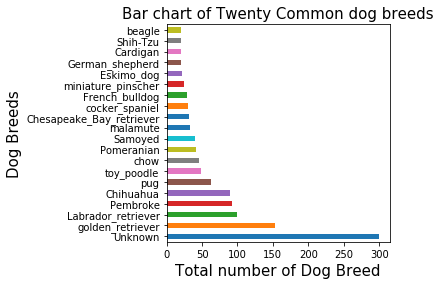

In [145]:
plt.figure(figsize=([4, 4]))
breed_counts[:20].plot(kind='barh')
plt.title('Bar chart of Twenty Common dog breeds', fontsize=15)
#plt.ylim(0,200)
plt.ylabel('Dog Breeds', fontsize=15)
plt.xlabel('Total number of Dog Breed',fontsize=15)
plt.yticks(fontsize=10)
plt.savefig('Popular Dog-breed.png', bbox_inches="tight")
plt.show()

<li> Popular breed is golden retriever

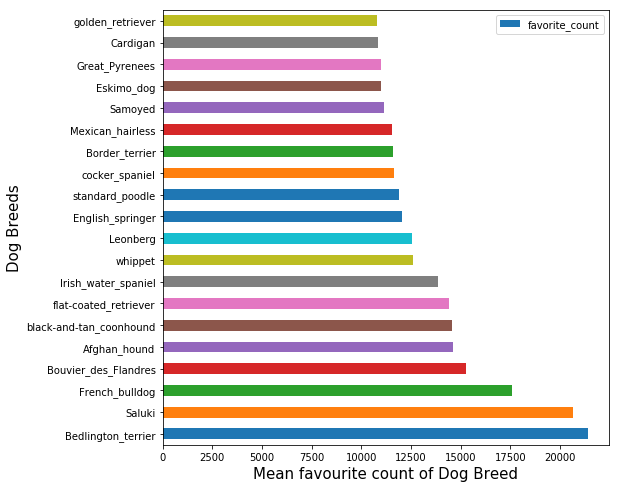

In [146]:
plt.figure(figsize=(8, 8))
breeds_likes.nlargest(n=20, keep='first').plot(kind= 'barh', legend=True)
plt.ylabel('Dog Breeds', fontsize=15)
plt.xlabel('Mean favourite count of Dog Breed',fontsize=15)
plt.yticks(fontsize=10)
plt.savefig('Highly liked Dog-breed.png', bbox_inches="tight")
plt.show()
plt.show()

<li> Most Favorited breed is Bedlington_terrier

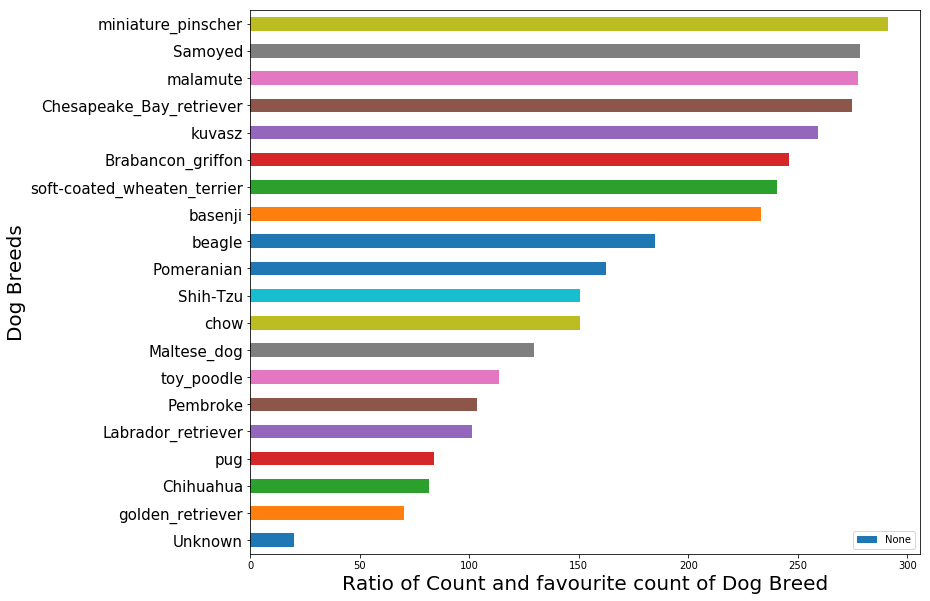

In [147]:
plt.figure(figsize=(12, 10))
count_likes_ratio.nsmallest(n=20, keep='first').plot(kind= 'barh', legend=True)
plt.ylabel('Dog Breeds', fontsize=20)
plt.xlabel('Ratio of Count and favourite count of Dog Breed',fontsize=20)
plt.yticks(fontsize=15)
plt.savefig('HighratiolikedDogbreed.png',bbox_inches="tight")
plt.show()
plt.show()

<li> Chihuahua has overall likes compared to labrador retriever which is more common 

In [148]:
breeds_rating = data_viz.groupby(['dog_breeds'])['rating_numerator'].mean()#
breeds_rating

dog_breeds
Afghan_hound                      9.666667 
Airedale                          9.833333 
American_Staffordshire_terrier    10.133333
Appenzeller                       11.000000
Australian_terrier                11.500000
Bedlington_terrier                10.333333
Bernese_mountain_dog              11.272727
Blenheim_spaniel                  11.100000
Border_collie                     10.454545
Border_terrier                    12.142857
Boston_bull                       9.416667 
Bouvier_des_Flandres              13.000000
Brabancon_griffon                 10.000000
Brittany_spaniel                  10.375000
Cardigan                          11.142857
Chesapeake_Bay_retriever          10.838710
Chihuahua                         10.533333
Dandie_Dinmont                    9.571429 
Doberman                          11.333333
English_setter                    9.875000 
English_springer                  10.500000
EntleBucher                       11.000000
Eskimo_dog           

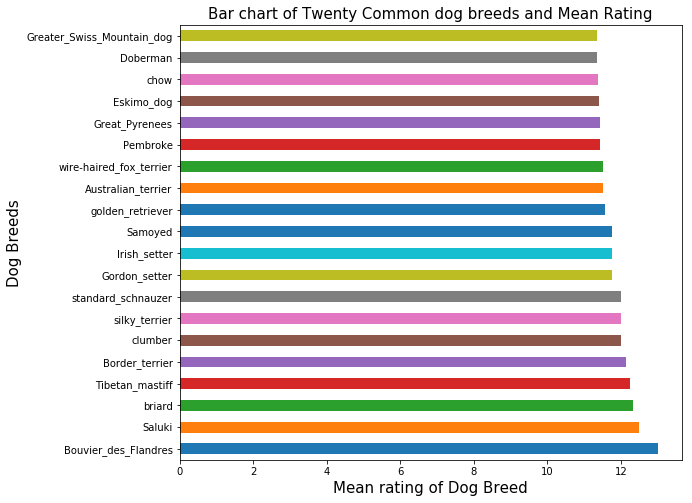

In [149]:
plt.figure(figsize=(9, 8))
breeds_rating.nlargest(n=20, keep='first').plot(kind='barh')
plt.title('Bar chart of Twenty Common dog breeds and Mean Rating', fontsize=15)
plt.ylabel('Dog Breeds', fontsize=15)
plt.xlabel('Mean rating of Dog Breed',fontsize=15)
plt.yticks(fontsize=10)
plt.savefig('Highrated_Dogbreed.png',bbox_inches="tight")
plt.show()

<li> Most rated breeed is Bouvier_des_Flandres

In [150]:
count_rating_ratio=breeds_rating/breed_counts
count_rating_ratio.nsmallest(n=20, keep='first')

Unknown                     0.029933
golden_retriever            0.075569
Labrador_retriever          0.111800
Chihuahua                   0.117037
Pembroke                    0.122904
pug                         0.165193
toy_poodle                  0.224073
chow                        0.247164
Pomeranian                  0.267103
Samoyed                     0.293750
malamute                    0.329660
Chesapeake_Bay_retriever    0.349636
cocker_spaniel              0.377778
French_bulldog              0.385256
miniature_pinscher          0.418403
Maltese_dog                 0.490305
beagle                      0.507500
Shih-Tzu                    0.517500
Eskimo_dog                  0.518595
German_shepherd             0.523810
dtype: float64

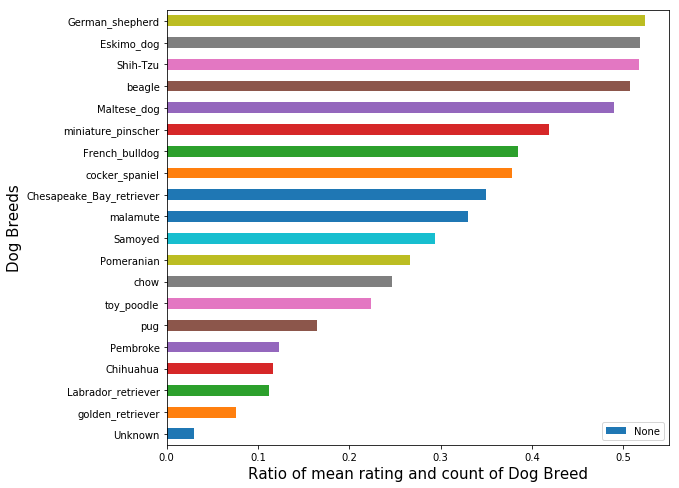

In [151]:
plt.figure(figsize=(9, 8))
count_rating_ratio.nsmallest(n=20, keep='first').plot(kind= 'barh', legend=True)
plt.ylabel('Dog Breeds', fontsize=15)
plt.xlabel('Ratio of mean rating and count of Dog Breed',fontsize=15)
plt.yticks(fontsize=10)
plt.savefig('HighgrossratedDog_breed.png',bbox_inches="tight")
plt.show()


<li> Shows that saluki and Bouvier_des_Flandres which has a high mean rating is not really rated high

In [152]:

stage = data_viz.drop((data_viz[data_viz['dog_stages']=='None']).index).groupby(['dog_stages','year'])['rating_numerator'].mean()

stage

dog_stages     year
doggo          2016    11.285714
               2017    12.642857
doggo, pupper  2016    11.666667
floofer        2016    11.833333
               2017    12.000000
pupper         2015    10.063492
               2016    10.618644
               2017    12.600000
puppo          2016    11.250000
               2017    12.909091
Name: rating_numerator, dtype: float64

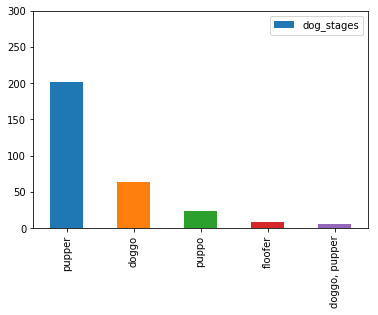

In [153]:
count_stage=data_viz.drop((data_viz[data_viz['dog_stages']=='None']).index).dog_stages.value_counts()
count_stage.plot(kind= 'bar', legend=True)
plt.savefig('dogstagepopularity.png',bbox_inches="tight")
plt.ylim(0,300)
plt.show()

<li> Most popular dog stage is pupper 

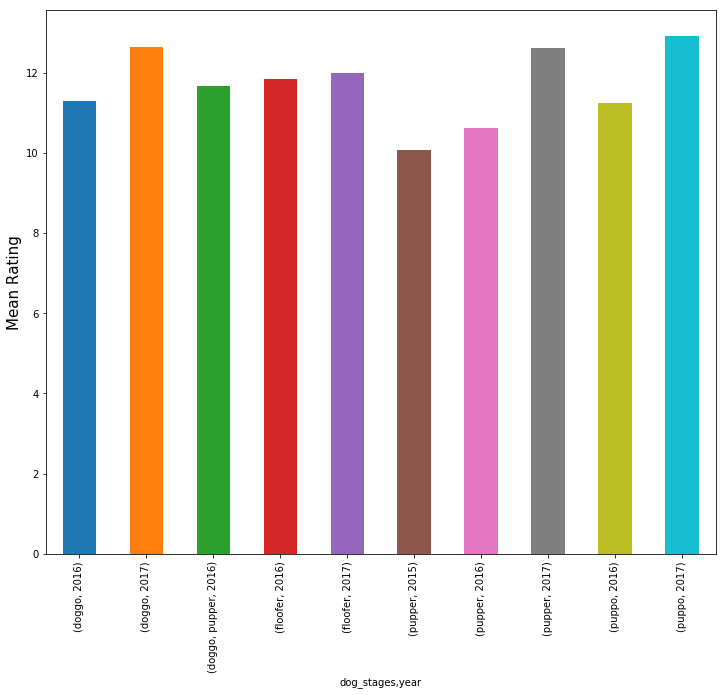

In [154]:
plt.figure(figsize=(12, 10))
stage.plot(kind='bar')
plt.ylabel('Mean Rating', fontsize=15)
plt.savefig('stagerating.png',bbox_inches="tight")
plt.show()

in 2016, floofer has the highest mean rating

in 2017, Puppo has the highest mean rating

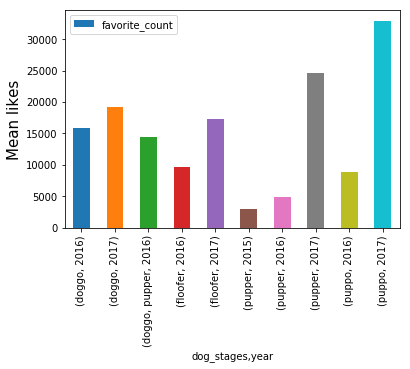

In [155]:
stagelike=data_viz.drop((data_viz[data_viz['dog_stages']=='None']).index).groupby(['dog_stages','year'])['favorite_count'].mean()
stagelike.plot(kind= 'bar', legend=True)
plt.ylabel('Mean likes', fontsize=15)
plt.savefig('stagelike.png',bbox_inches="tight")
plt.show()

in 2016, Doggo has the highest mean likes

in 2017, Pupper has the highest mean likes

Across the three years, pupper has the highest likes

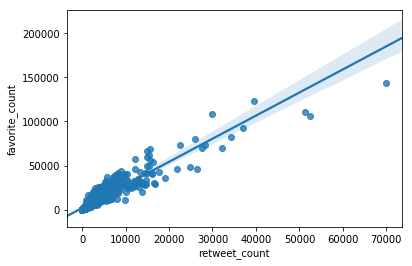

In [156]:
sns.regplot(
    data_viz.retweet_count,
    data_viz.favorite_count,
    data=data_viz,
    fit_reg=True);

retweet counts is well correlated with favorite counts 